# Assignment 1 / Task 2

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data paths

In [2]:
data_path_cs = "./output_exp22_1_4963663.dat"
data_path_cb = "./output_exp22_2_4963664.dat"

### Functions

In [3]:
# just computes speedup and efficiency
def compute_speedup_efficiency(df_group):
    base_runtime = df_group[df_group['p'] == 1]['mean_runtime'].values[0]
    df_group['speedup'] = base_runtime / df_group['mean_runtime']
    df_group['par_eff'] = df_group['speedup'] / df_group['p']
    return df_group

# takes the dataframe , applies compute_speedup_efficiency() and groups by size
def generate_result_df(data_grouped):
    return data_grouped.groupby('size').apply(compute_speedup_efficiency).reset_index(drop=True)

# funtion for plotting
def plot_metric(df, y_col, y_label, title):
    plt.figure(figsize=(8, 5))
    for size in df['size'].unique():
        subset = df[df['size'] == size]
        plt.plot(subset['p'], subset[y_col], marker='o', label=f"size={size}")
    plt.xlabel("Number of Cores (p)")
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [4]:
# reads both datasets
data_cs = pd.read_csv(data_path_cs, sep=';', names=['size', 'patch', 'p', 'runtime'])
data_cb = pd.read_csv(data_path_cb, sep=';', names=['size', 'patch', 'p', 'runtime'])

# groups both datasets by "size" and "p"
data_cs_grouped = data_cs.groupby(['size', 'p'])['runtime'].mean().reset_index(name='mean_runtime')
data_cb_grouped = data_cb.groupby(['size', 'p'])['runtime'].mean().reset_index(name='mean_runtime')

# result df for both cs and cb
result_cs_df = generate_result_df(data_cs_grouped)
result_cb_df = generate_result_df(data_cb_grouped)

### Speedup and parallel efficiency results for Cs

In [11]:
result_cs_df

,size,p,mean_runtime,speedup,par_eff
0,165,1,0.312478,1.000000,1.000000
1,165,2,0.165495,1.888140,0.944070
2,165,4,0.095523,3.271242,0.817810
3,165,8,0.071554,4.366987,0.545873
4,165,16,0.068333,4.572863,0.285804
5,165,24,0.080112,3.900533,0.162522
6,165,32,0.091840,3.402425,0.106326
7,1020,1,11.475444,1.000000,1.000000
8,1020,2,5.767938,1.989523,0.994761
9,1020,4,2.896431,3.961926,0.990481


### Speedup and parallel efficiency results for Cb

In [12]:
result_cb_df

,size,p,mean_runtime,speedup,par_eff
0,165,1,0.401414,1.000000,1.000000
1,165,2,0.212745,1.886832,0.943416
2,165,4,0.122327,3.281484,0.820371
3,165,8,0.082796,4.848226,0.606028
4,165,16,0.072222,5.558021,0.347376
5,165,24,0.087253,4.600596,0.191692
6,165,32,0.097877,4.101188,0.128162
7,1020,1,14.563740,1.000000,1.000000
8,1020,2,7.465734,1.950744,0.975372
9,1020,4,3.781028,3.851794,0.962948


## Plots for Cs

### Plot 1: Absolute runtime

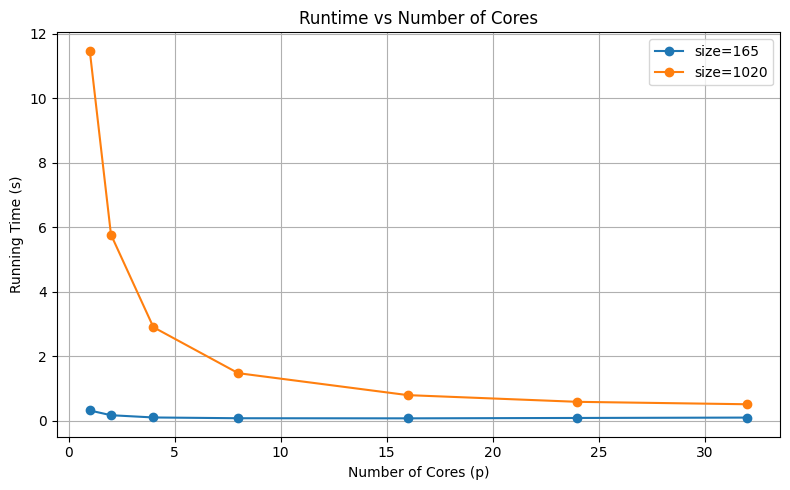

In [5]:
# Plot 1: Absolute runtime
plot_metric(result_cs_df, 'mean_runtime', 'Running Time (s)', 'Runtime vs Number of Cores')

### Plot 2: Relative speed-up

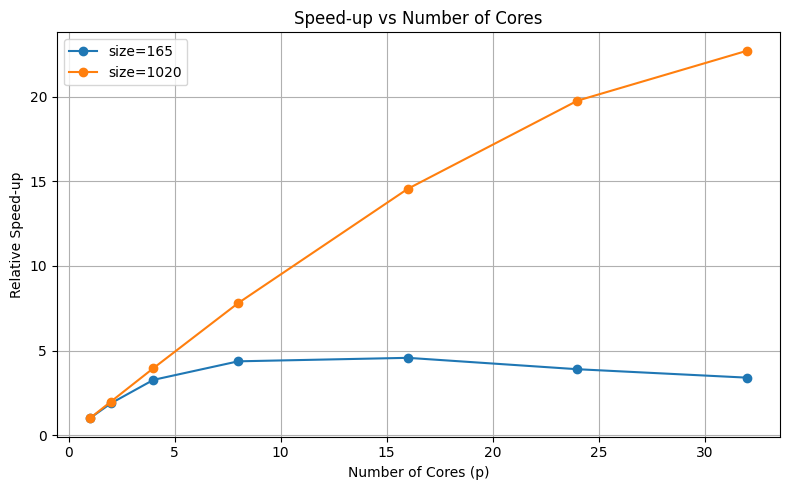

In [6]:
# Plot 2: Relative speed-up
plot_metric(result_cs_df, 'speedup', 'Relative Speed-up', 'Speed-up vs Number of Cores')

### Plot 3: Parallel efficiency

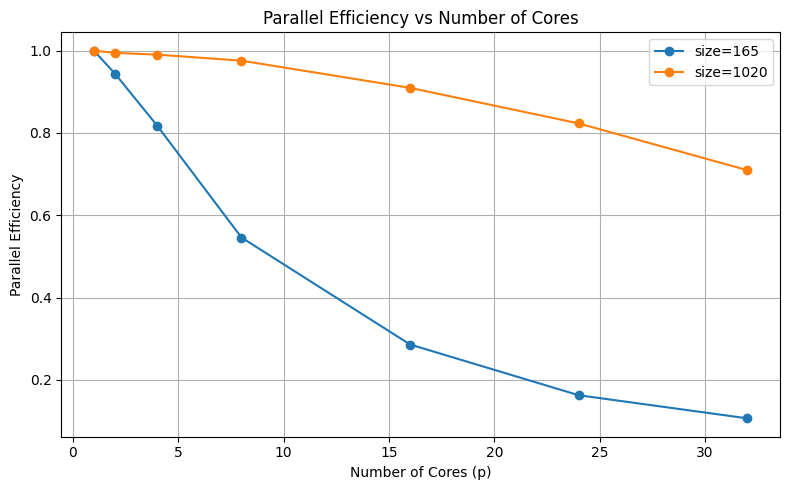

In [7]:
# Plot 3: Parallel efficiency
plot_metric(result_cs_df, 'par_eff', 'Parallel Efficiency', 'Parallel Efficiency vs Number of Cores')

## Plots for Cb

### Plot 1: Absolute runtime

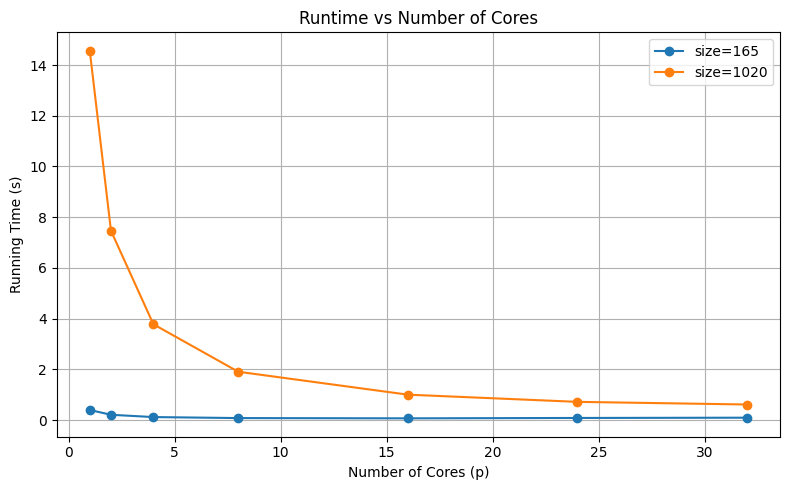

In [8]:
# Plot 1: Absolute runtime
plot_metric(result_cb_df, 'mean_runtime', 'Running Time (s)', 'Runtime vs Number of Cores')

### Plot 2: Relative speed-up

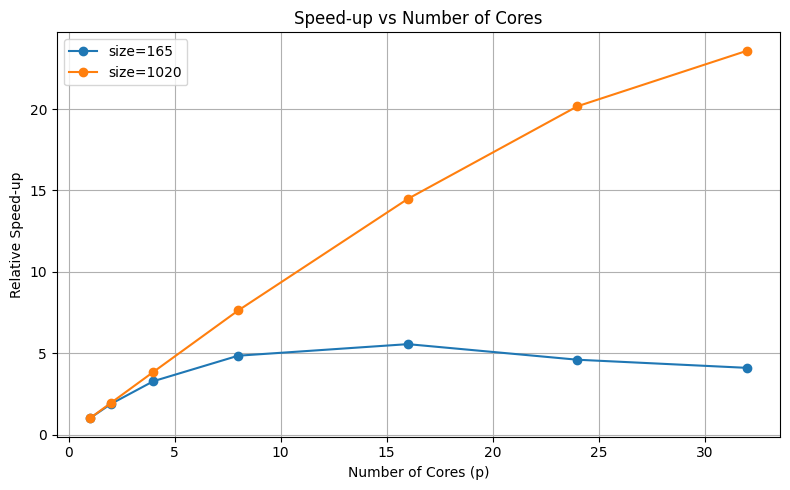

In [9]:
# Plot 2: Relative speed-up
plot_metric(result_cb_df, 'speedup', 'Relative Speed-up', 'Speed-up vs Number of Cores')

### Plot 3: Parallel efficiency

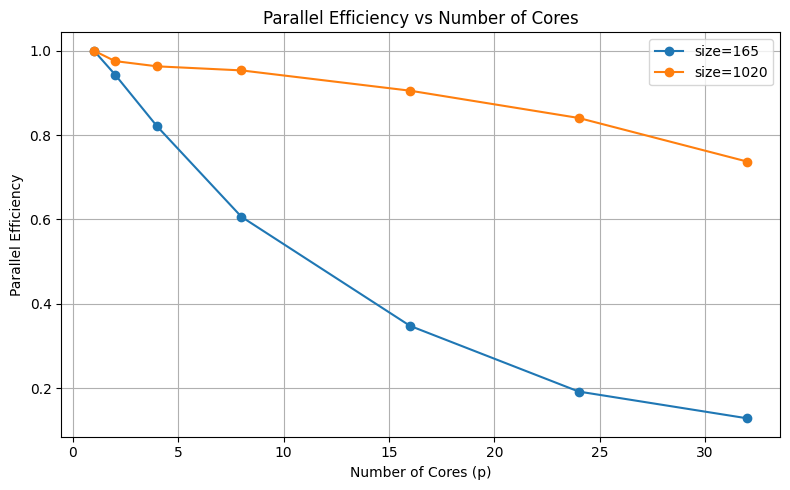

In [10]:
# Plot 3: Parallel efficiency
plot_metric(result_cb_df, 'par_eff', 'Parallel Efficiency', 'Parallel Efficiency vs Number of Cores')